# Get Tracks

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import clickpoints

# load the example data
clickpoints.loadExample("magnetic_tweezer")

# open database
db = clickpoints.DataFile("track.cdb")

path track.cdb
Open database with version 22


## Get all Tracks

We query all the tracks found in the database and iterate over them. For each track we get the points as an Nx2 array.

Be aware that this method does not handle well tracks with missing data points.

In [2]:
# get all tracks
tracks = db.getTracks()

# iterate over all tracks
for track in tracks:
    print(track.type.name, track.points.shape)

tracks (68, 2)
tracks (68, 2)
tracks (68, 2)
tracks (68, 2)
tracks (68, 2)
tracks (68, 2)
tracks (68, 2)
tracks (68, 2)
tracks (68, 2)
tracks (68, 2)
tracks (68, 2)
tracks (68, 2)


## Get Complete Track Array

We can also receive all the tracks of the database in one array. This is usually quicker for large databases than querying each track separately. The resulting array is (Number of tracks)x(Number of images)x2. If a track does not have a marker in one images, np.nan values are filled into the array.

In [3]:
data = db.getTracksNanPadded()
print(data.shape)

(12, 68, 2)


## Plot Track Displacement

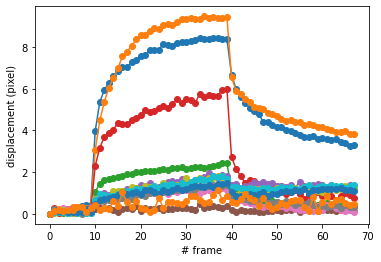

In [4]:
# get all tracks
tracks = db.getTracks()

# iterate over all tracks
for track in tracks:
    # get the points
    points = track.points
    # calculate the distance to the first point
    distance = np.linalg.norm(points[:, :] - points[0, :], axis=1)
    # plot the displacement
    plt.plot(track.frames, distance, "-o")

# label the axes
plt.xlabel("# frame")
plt.ylabel("displacement (pixel)");

We can do the same with the complete track array, which is especially for large databases significantly faster than querying each track separately.

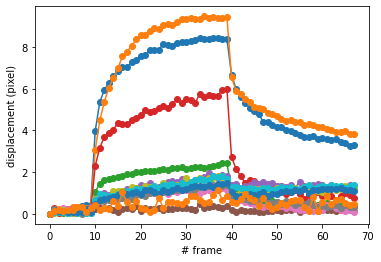

In [5]:
# get all tracks (tracks x images x 2)
points = db.getTracksNanPadded()

# get the distance to the first point of each track
distance = np.linalg.norm(points[:, :, :] - points[:, 0:1, :], axis=2)

# plot the distances
plt.plot(distance.T, "-o")

# label the axes
plt.xlabel("# frame")
plt.ylabel("displacement (pixel)");

## Plot Track Trajectories

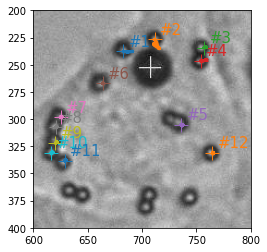

In [6]:
# get the first image
im_entry = db.getImage(0)

# we load the pixel data from the Image database entry
im_pixel = im_entry.data

# plot the image
plt.imshow(im_pixel, cmap="gray")

# iterate over all tracks
for track in tracks:
    # get the points
    points = track.points
    # plot the beginning of the track
    cross, = plt.plot(points[0, 0], points[0, 1], '+', ms=14, mew=1)
    # plot the track with the same color
    plt.plot(points[:, 0], points[:, 1], lw=3, color=cross.get_color())
    # plot the track id with a little offset and the same color
    plt.text(points[0, 0]+5, points[0, 1]-5, "#%d" % track.id, color=cross.get_color(), fontsize=15)

# zoom into the image
plt.xlim(600, 800)
plt.ylim(400, 200);